# Simulations for prey-predator models with exogenous mortality source affecting both predators and preys

In [1]:
#Import librairies
import numpy as np
import matplotlib.pyplot as plt

#Import the module and make it reload each time there is a change 
import importlib
import double_exo
importlib.reload(double_exo)

<module 'double_exo' from '/run/netsop/u/home-sam/home/aloyens/Internship_CACOLAC/sim_models/First_sim_CACOLAC/double_exo.py'>

### The model


\begin{cases}
\dot{x} = g(x)x - f(x,y)y\\ 
\dot{y} = \gamma f(x,y) y - m(x,y)y\\
x(nT^{+}) = x(nT) - E_xh_x(x(nT))\\
y(nT^{+}) = y(nT) - E_yh_y(y(nT))\\
\end{cases} 

In [2]:
#Set the parameters that will be used all along the code
r = 0.5
K = 10 
a = 0.1
#c = 1
m = 0.1
gamma = 0.8
#b = 0.5
#q = 0.1

E_x = 0.1
E_y = 0.05 #Usually half of E_x
T = 1

t_0 = 0
t_n = 100

tt = 1 #just to not have a missing argument t when we solve models

In [3]:
#Other initial values but the periodic solution
x0_a = 5 
y0_a = 1
x0y0_a = [x0_a, y0_a]

x0_b = 7.5
y0_b = 2
x0y0_b = [x0_b, y0_b]

x0_c = 10
y0_c = 3
x0y0_c = [x0_c, y0_c]

## 1. Lotka-Volterra model with logistic growth and no harvesting on y.

Solve the ODE with other initial values but the periodic solution

In [4]:
#x and y points for different initial values
xy_a = double_exo.solve_predator_prey_model(
        xy=x0y0_a,
        t=tt,
        gamma=gamma,
        E_x=E_x,
        E_y=E_y,
        T=T,
        func_g=double_exo.logistic_model_x,
        kwargs_g={'r':r, 'K':K},
        func_f=double_exo.multiply_x,
        kwargs_f={'z': a}, 
        func_m=double_exo.identity,
        kwargs_m={'z': m},
        func_h_x=double_exo.return_x_x,
        kwargs_h_x={},
        func_h_y=double_exo.return_zero_y,
        kwargs_h_y={},
        t_0=t_0,
        t_n=t_n  
        )
x_a = xy_a[0]
y_a = xy_a[1]


xy_b = double_exo.solve_predator_prey_model(
        xy=x0y0_b,
        t=tt,
        gamma=gamma,
        E_x=E_x,
        E_y=E_y,
        T=T,
        func_g=double_exo.logistic_model_x,
        kwargs_g={'r':r, 'K':K},
        func_f=double_exo.multiply_x,
        kwargs_f={'z': a}, 
        func_m=double_exo.identity,
        kwargs_m={'z': m},
        func_h_x=double_exo.return_x_x,
        kwargs_h_x={},
        func_h_y=double_exo.return_zero_y,
        kwargs_h_y={},
        t_0=t_0,
        t_n=t_n  
        )
x_b = xy_b[0]
y_b = xy_b[1]


xy_c = double_exo.solve_predator_prey_model(
        xy=x0y0_c,
        t=tt,
        gamma=gamma,
        E_x=E_x,
        E_y=E_y,
        T=T,
        func_g=double_exo.logistic_model_x,
        kwargs_g={'r':r, 'K':K},
        func_f=double_exo.multiply_x,
        kwargs_f={'z': a}, 
        func_m=double_exo.identity,
        kwargs_m={'z': m},
        func_h_x=double_exo.return_x_x,
        kwargs_h_x={},
        func_h_y=double_exo.return_zero_y,
        kwargs_h_y={},
        t_0=t_0,
        t_n=t_n 
        )
x_c = xy_c[0]
y_c = xy_c[1]



#time points
t = xy_a[2]

Plot results

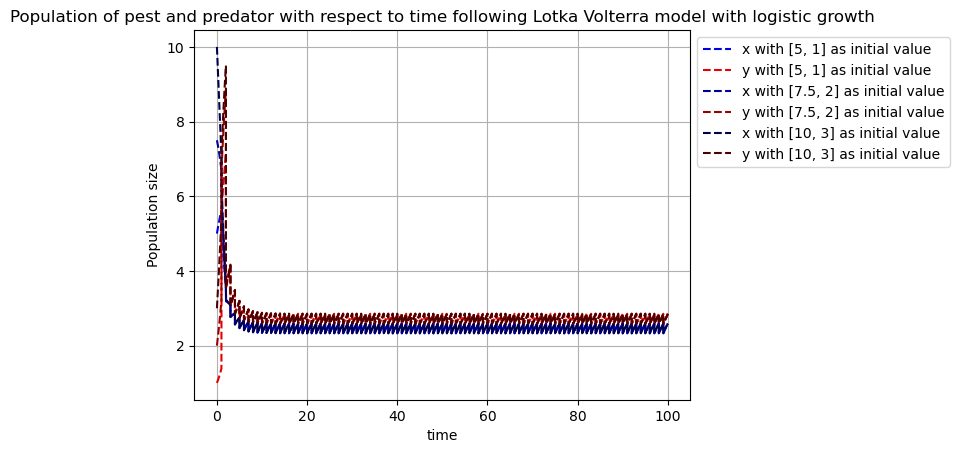

In [5]:
plt.plot(t, x_a, color = (0,0,0.9), linestyle='--', label=f'x with {x0y0_a} as initial value')
plt.plot(t, y_a, color = (0.9,0,0), linestyle='--', label=f'y with {x0y0_a} as initial value')
plt.plot(t, x_b, color = (0,0,0.6), linestyle='--', label=f'x with {x0y0_b} as initial value')
plt.plot(t, y_b, color = (0.6,0,0), linestyle='--', label=f'y with {x0y0_b} as initial value')
plt.plot(t, x_c, color = (0,0,0.3), linestyle='--', label=f'x with {x0y0_c} as initial value')
plt.plot(t, y_c, color = (0.3,0,0), linestyle='--', label=f'y with {x0y0_c} as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator with respect to time following Lotka Volterra model with logistic growth')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()